#2.5 머신러닝 알고리즘을 위한 데이터 준비

---
#Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#Libraries

In [ ]:
import os
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

#CHAPTER 4

#4.1 선형 회귀

#4.1.1 정규방정식
*   비용 함수를 최소화하는 theta값을 찾기 위한 해석적인 방법 -> 정규방정식
*   정규방정식(Normal equation 혹은 Ordinary least squares 혹은 linear least squares)은 통계학에서 선형 회귀상에서 알지 못하는 값(parameter)를 예측하기 위한 방법론
*   
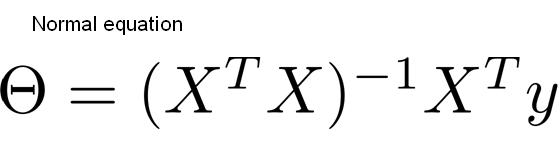

In [ ]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

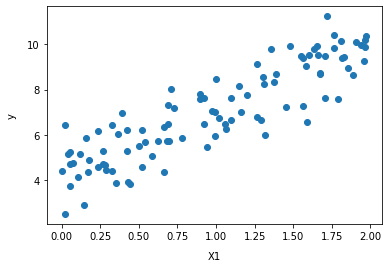

In [ ]:
scatter = plt.scatter(X, y)

plt.xlabel('X1', labelpad = 10)
plt.ylabel('y', labelpad = 10)

plt.show()

In [ ]:
X_b = np.c_[np.ones((100, 1)), X]
# print('X_b = ', X_b)

In [ ]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print('theta_best = ', theta_best)

theta_best =  [[4.21589322]
 [2.87659202]]


In [ ]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
print('y_predict = ',  y_predict)

y_predict =  [[4.21589322]
 [9.96907725]]


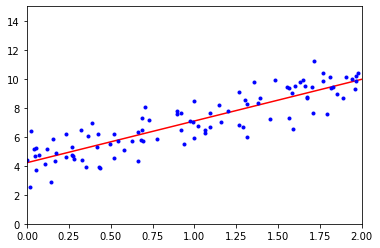

In [ ]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

* 사이킷런에서의 선형회귀

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print('lin_reg.intercept_ = ', lin_reg.intercept_)
print('lin_reg.coef_ = ', lin_reg.coef_)

lin_reg.intercept_ =  [4.21589322]
lin_reg.coef_ =  [[2.87659202]]


In [ ]:
lin_reg_pre = lin_reg.predict(X_new)
print('lin_reg_pre = ', lin_reg_pre)

lin_reg_pre =  [[4.21589322]
 [9.96907725]]


In [ ]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
print('theta_best_svd = ', theta_best_svd)

theta_best_svd =  [[4.21589322]
 [2.87659202]]


In [ ]:
pseudo_inv = np.linalg.pinv(X_b).dot(y)
print('pseudo_inv = ', pseudo_inv)

pseudo_inv =  [[4.21589322]
 [2.87659202]]


#4.2 경사 하강법

#4.2.1 배치 경사 하강법

In [ ]:
eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1)

for iteration in range(n_iterations):
  gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
  theta = theta - eta * gradients

print('theta = ', theta)

theta =  [[4.21589322]
 [2.87659202]]


#4.2.2 확률적 경사 하강법

In [ ]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
  return t0/(t+t1)

theta = np.random.randn(2, 1)
print('theta = ', theta)

for epoch in range(n_epochs):
  for i in range(m):
    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gradients = 2*xi.T.dot(xi.dot(theta) - yi)
    eta = learning_schedule(epoch*m + i)
    theta = theta - eta*gradients
    
  # if (epoch < 5):
  #   print('theta = ', theta)    

# print('i = ', i)
print('theta = ', theta)

theta =  [[0.40706712]
 [1.331459  ]]
theta =  [[3.91715409]
 [3.2074583 ]]
theta =  [[4.02917821]
 [2.93995816]]
theta =  [[4.12304078]
 [2.73773727]]
theta =  [[4.31923964]
 [2.92927619]]
theta =  [[4.13468977]
 [2.91550185]]
theta =  [[4.20561672]
 [2.83379684]]


* 사이킷런 SDG 방식 선형회귀 -> SGDRegressor

In [ ]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [ ]:
print('sgd_reg.intercept_ = ', sgd_reg.intercept_)
print('sgd_reg.coef_ = ', sgd_reg.coef_)

sgd_reg.intercept_ =  [4.18033147]
sgd_reg.coef_ =  [2.8521284]


#4.2.3 미니배치 경사 하강법

#4.3 다항 회귀



*   잡음을 포함한 비선형 데이터셋



In [ ]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
# y = 0.5X^2 + X + (2 + np.random.randn(m, 1))

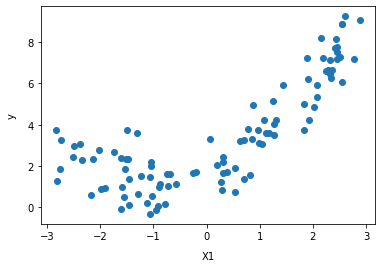

In [ ]:
scatter = plt.scatter(X, y)

plt.xlabel('X1', labelpad = 10)
plt.ylabel('y', labelpad = 10)

plt.show()

* 사이킷런 PolynomialFeatures 사용해 훈련 데이터를 변환

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [ ]:
print('X[0] = ', X[0])
print('X_poly[0] = ', X_poly[0])

X[0] =  [-2.33567488]
X_poly[0] =  [-2.33567488  5.45537715]


* 확장된 훈련 데이터에 LinearRegression 적용

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print('lin_reg.intercept_ = ', lin_reg.intercept_)
print('lin_reg.coef_ = ', lin_reg.coef_)

lin_reg.intercept_ =  [1.73157776]
lin_reg.coef_ =  [[1.04657633 0.52359636]]


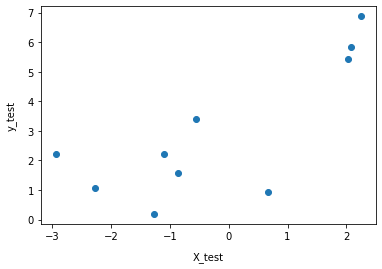

In [ ]:
# 
m = 10
X_test = 6 * np.random.rand(m, 1) - 3
y_test = 0.5 * X_test**2 + X_test + 2 + np.random.randn(m, 1)

scatter = plt.scatter(X_test, y_test)

plt.xlabel('X_test', labelpad = 10)
plt.ylabel('y_test', labelpad = 10)

plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_features_test = PolynomialFeatures(degree=2, include_bias=False)
X_poly_test = poly_features.fit_transform(X_test)

print('X_test[0] = ', X_test[0])
print('X_poly_test[0] = ', X_poly_test[0])

lin_reg_test = LinearRegression()
lin_reg_test.fit(X_poly_test, y_test)

print('lin_reg_test.intercept_ = ', lin_reg_test.intercept_)
print('lin_reg_test.coef_ = ', lin_reg_test.coef_)

X_test[0] =  [-1.27323087]
X_poly_test[0] =  [-1.27323087  1.62111686]
lin_reg_test.intercept_ =  [2.0153984]
lin_reg_test.coef_ =  [[1.04164075 0.37135898]]
